#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [70]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [71]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [72]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [73]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [74]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [76]:
model = Sequential()

In [77]:
#卷積層1

In [78]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [79]:
model.add(Dropout(rate=0.25))

In [80]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [81]:
#卷積層2與池化層2

In [82]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [83]:
model.add(Dropout(0.25))

In [84]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [85]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [86]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [87]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [88]:
model.add(Dense(10, activation='softmax'))

In [89]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [90]:
model.save_weights("./cifarCnnModel.h5")
print("save model to disk")

save model to disk


# 載入之前訓練的模型

In [91]:
try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


# 訓練模型

In [92]:
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# "MSE"
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=25, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/25
37500/37500 [==============================] - 69s 2ms/step - loss: 0.0903 - accuracy: 0.0999 - val_loss: 0.0899 - val_accuracy: 0.1152
Epoch 2/25
37500/37500 [==============================] - 68s 2ms/step - loss: 0.0901 - accuracy: 0.1058 - val_loss: 0.0898 - val_accuracy: 0.1319
Epoch 3/25
37500/37500 [==============================] - 69s 2ms/step - loss: 0.0900 - accuracy: 0.1124 - val_loss: 0.0898 - val_accuracy: 0.1412
Epoch 4/25
37500/37500 [==============================] - 68s 2ms/step - loss: 0.0898 - accuracy: 0.1160 - val_loss: 0.0897 - val_accuracy: 0.1524
Epoch 5/25
37500/37500 [==============================] - 69s 2ms/step - loss: 0.0898 - accuracy: 0.1236 - val_loss: 0.0896 - val_accuracy: 0.1625
Epoch 6/25
37500/37500 [==============================] - 68s 2ms/step - loss: 0.0896 - accuracy: 0.1256 - val_loss: 0.0896 - val_accuracy: 0.1710
Epoch 7/25
37500/37500 [==============================] - 68s 2ms/st

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc, val_accuracy):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_accuracy])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_accuracy'], loc='upper left')
    plt.show()

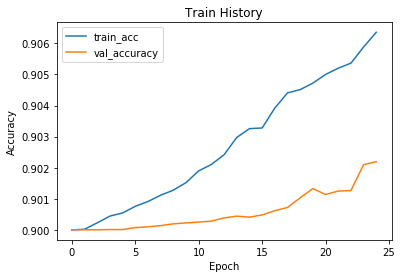

In [125]:
show_train_history('accuracy', 'val_accuracy')

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(loss,val_loss):
    plt.plot(train_history.history[loss])
    plt.plot(train_history.history[val_loss])
    plt.title('Test History')
    plt.ylabel('Loss Rate')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

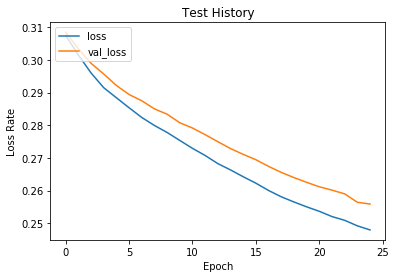

In [127]:
show_train_history('loss','val_loss')

In [97]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print()
print('accuracy=',scores[1])

50000/50000 [==============================] - 21s 411us/step

accuracy= 0.2671000063419342


In [98]:
# "binary _crossentropy"
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=25, batch_size=128, verbose=1)  

Train on 37500 samples, validate on 12500 samples
Epoch 1/25
37500/37500 [==============================] - 71s 2ms/step - loss: 0.3075 - accuracy: 0.9000 - val_loss: 0.3084 - val_accuracy: 0.9000
Epoch 2/25
37500/37500 [==============================] - 75s 2ms/step - loss: 0.3015 - accuracy: 0.9000 - val_loss: 0.3034 - val_accuracy: 0.9000
Epoch 3/25
37500/37500 [==============================] - 74s 2ms/step - loss: 0.2960 - accuracy: 0.9002 - val_loss: 0.2989 - val_accuracy: 0.9000
Epoch 4/25
37500/37500 [==============================] - 72s 2ms/step - loss: 0.2915 - accuracy: 0.9004 - val_loss: 0.2957 - val_accuracy: 0.9000
Epoch 5/25
37500/37500 [==============================] - 72s 2ms/step - loss: 0.2884 - accuracy: 0.9005 - val_loss: 0.2922 - val_accuracy: 0.9000
Epoch 6/25
37500/37500 [==============================] - 71s 2ms/step - loss: 0.2853 - accuracy: 0.9008 - val_loss: 0.2894 - val_accuracy: 0.9001
Epoch 7/25
37500/37500 [==============================] - 71s 2ms/st

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

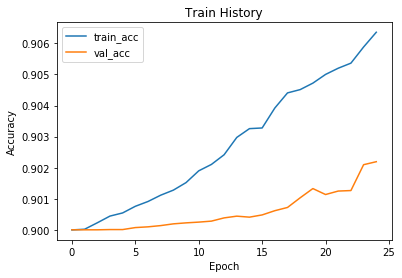

In [100]:
show_train_history('accuracy','val_accuracy')

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history_2(loss,val_loss):
    plt.plot(train_history.history[loss])
    plt.plot(train_history.history[val_loss])
    plt.title('Train History')
    plt.ylabel('Loss Rate')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

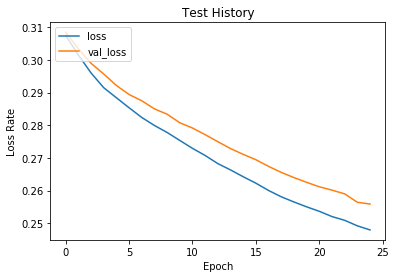

In [129]:
show_train_history('loss','val_loss')

In [130]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print()
print('accuracy=',scores[1])

50000/50000 [==============================] - 19s 378us/step

accuracy= 0.9022635221481323


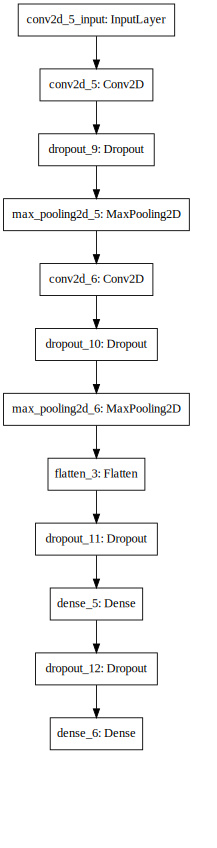

In [131]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, dpi=64).create(prog='dot', format='svg'))

loss function選擇binary _crossentropy 對accrancy有較好的結果